# TP à rendre 3 Gradient, filtrage et morphologie
Dans ce TP, nous aimerions appliquer une analyse d'image en efféctuant:
- un calcul basique de gradient horizontal et vertical,
- un calcul du module et de l'orientation du gradient,
- un calcul du gradient en utilisant une convolution avec les filtres Sobel et Prewitt,
- un calcul du Laplacien du Gaussien (dérivée seconde de l'image)
- un filtrage de l'image avec un filtre médian, gaussien et un filtre moyen et comparer la difference,
- un seuillage de l'image,
- des morphologies mathématiques (dilatation et érosion),
L'objectif est d'observer le résultat pour chaque opération et de comparer les differentes méthodes.

In [8]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib as mpl
import math as math

In [9]:
# préparation de l'image
image = np.zeros((8,8))
image[0,0]=0;image[0,1]=12;image[0,2]=53;image[0,3]=32;image[0,4]=190;image[0,5]=53;image[0,6]=174;image[0,7]=53;
image[1,0]=57;image[1,1]=32;image[1,2]=12;image[1,3]=227;image[1,4]=219;image[1,5]=202;image[1,6]=32;image[1,7]=154;
image[2,0]=65;image[2,1]=85;image[2,2]=93;image[2,3]=239;image[2,4]=251;image[2,5]=227;image[2,6]=65;image[2,7]=158;
image[3,0]=73;image[3,1]=146;image[3,2]=146;image[3,3]=247;image[3,4]=255;image[3,5]=235;image[3,6]=154;image[3,7]=130;
image[4,0]=97;image[4,1]=166;image[4,2]=117;image[4,3]=231;image[4,4]=243;image[4,5]=210;image[4,6]=117;image[4,7]=117;
image[5,0]=117;image[5,1]=190;image[5,2]=36;image[5,3]=146;image[5,4]=178;image[5,5]=93;image[5,6]=20;image[5,7]=170;
image[6,0]=130;image[6,1]=202;image[6,2]=73;image[6,3]=20;image[6,4]=12;image[6,5]=53;image[6,6]=85;image[6,7]=194;
image[7,0]=146;image[7,1]=206;image[7,2]=130;image[7,3]=117;image[7,4]=85;image[7,5]=166;image[7,6]=182;image[7,7]=215;
image

array([[  0.,  12.,  53.,  32., 190.,  53., 174.,  53.],
       [ 57.,  32.,  12., 227., 219., 202.,  32., 154.],
       [ 65.,  85.,  93., 239., 251., 227.,  65., 158.],
       [ 73., 146., 146., 247., 255., 235., 154., 130.],
       [ 97., 166., 117., 231., 243., 210., 117., 117.],
       [117., 190.,  36., 146., 178.,  93.,  20., 170.],
       [130., 202.,  73.,  20.,  12.,  53.,  85., 194.],
       [146., 206., 130., 117.,  85., 166., 182., 215.]])

In [10]:
#lecture de l'image
image =cv.imread('Image.tif',0)
#décommenter au besoin

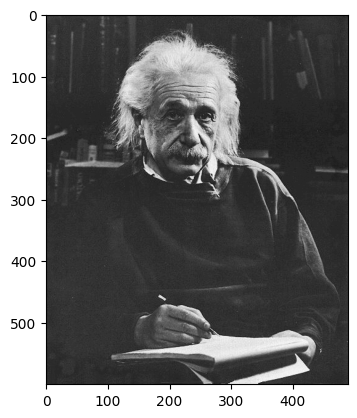

In [11]:
plt.imshow(image,cmap='gray')

# Calcul du gradient de l'image

Définir d'abord une fonction de convolution  


In [12]:
def convolution(image, filtre):
    x = filtre.shape[0]
    y = filtre.shape[1]
    img2 = cv.copyMakeBorder(image,
                            x//2, 
                            x//2, 
                            y//2, 
                            y//2, 
                            cv.BORDER_CONSTANT,
                            None, value = 0)

    img2 = img2.astype(int)
    imgRes = np.zeros(image.shape, dtype=float)

    for i in range (image.shape[0]):
        for j in range (image.shape[1]):
            current_portion = img2[i:i+x,j:j+y]*filtre
            imgRes[i][j] = np.sum(current_portion)

    return imgRes

Gradient par rapport à x et  Gradient par rapport à y

In [13]:
def gradient(image):
        filtre_x = np.array([[-1, 1]])
        gradient_x = convolution(image,filtre_x)
        filtre_y =np.array([[-1], [1]])
        gradient_y = convolution(image,filtre_y)
        return (gradient_x,gradient_y)

Magnitude du Gradient $Magnitude(G(i,j)) = \sqrt{(G_x(i,j)^2+G_y(j,j)^2} $

In [14]:
def g_magnitude(image):
    gradient_x,gradient_y= gradient(image)
    magnitude = np.array(math.sqrt((gradient_x)**2 + (gradient_y)**2))
    return magnitude

Orientation du gradient $\theta = tan^{-1}\left( \frac{G_y(i,j) }{G_x(j,j)}\right) $  
Il est possible d'utiliser la fonction np.arctan2, mais elle retourne les valeurs en radians. Il est possible de les convertir en degrees soit manuellement, soit en utilisant math.degrees

In [25]:
def g_orientation(image):
    gradient_x,gradient_y= gradient(image)
    orientation = np.array(np.arctan(gradient_y/gradient_x))
    return orientation


# Binarisation de l'image  


In [26]:
def thresholding(image,threshold):
    Bimage= np.zeros(image.shape, dtype=np.uint8)
    for i in range(Bimage.shape[0]):
        for j in range(Bimage.shape[1]):
            if image[i,j] > threshold:
                Bimage[i,j] = 1
    return Bimage

# Dilatation d'une image binaire

In [27]:
def dilation_binary(image, structingElt):
    x = structingElt.shape[0]
    y = structingElt.shape[1]
    var = x // 2
    img2 = cv.copyMakeBorder(image, var, var, var, var, cv.BORDER_CONSTANT, None, value=1)

    img2 = img2.astype(int)
    Dimage = np.zeros(image.shape, dtype=float)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            Dimage[i, j] = np.max(image[i, j], image[i, j-1], image[i-1, j], image[i+1, j], image[i-1, j-1])
    return Dimage


# Erosion d'une image binaire

In [28]:
def erosion_binary(image,structingElt): 
    x = structingElt.shape[0]
    y = structingElt.shape[1]
    img2 = cv.copyMakeBorder(image, x//2, x//2, y//2, y//2, cv.BORDER_CONSTANT, None, value=1)
                                                          
    img2 = img2.astype(int)
    Dimage = np.zeros(image.shape, dtype=float)
    for i in range (image.shape[0]):
        for j in range (image.shape[1]):        
            elts= np.sum(image[i, j], image[i, j-1], image[i-1, j], image[i+1, j], image[i-1, j-1])
            Dimage[i,j] = elts
    return Dimage

# Dérivée avec fitlre de Prewitt

In [19]:
def prewitt_filter(image):
    #Prewitt
    c=1
    filtre_x =  np.array([[-1, 0, 1], [-c, 0, c], [-1, 0, 1]])
    filtre_y = np.array([[1, c, 1], [0, 0, 0], [-1, -c, -1]])
    Gx_Prewitt = convolution(image,filtre_x)
    Gy_Prewitt = convolution(image,filtre_y)
    return Gx_Prewitt, Gy_Prewitt

# Dérivée avec fitlre de Sobel

In [20]:
def sobel_filter(image):
    #Sobel
    c=2
    filtre_x = np.array([[-1, 0, 1], [-c, 0, c], [-1, 0, 1]])
    filtre_y = np.array([[1, c, 1], [0, 0, 0], [-1, -c, -1]])
    Gx_Sobel = convolution(image,filtre_x)
    Gy_Sobel = convolution(image,filtre_y)
    return Gx_Sobel, Gy_Sobel

# Deuxième dérivée avec fitlre Laplacian

In [21]:
def laplacian_filter(image):
    filtre = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
    G_Laplacian = convolution(image,filtre)
    return G_Laplacian

# Filtrage avec fitlre Gaussien

In [22]:
def make_gaussian(Fsize, sigma):
    filtre = np.zeros((Fsize, Fsize), dtype=np.float16)
    gaussian_factor = 1 / (2 * np.pi * sigma)
    for i in range (Fsize):
        for j in range (Fsize):
            val = np.exp(-((i-Fsize)**2 + (j-Fsize)**2) / (2 * sigma**2 ))
            filtre[i][j] =  gaussian_factor * val
        
    return filtre

In [23]:
def gaussian_filter(image,Fsize, sigma):
    filtre = make_gaussian(Fsize, sigma)
    imageG = convolution(image,filtre)
    return imageG

# Filtrage avec fitlre Moyen

In [24]:
def mean_filter(image,sizeF):
    filtre = # à compléter
    imageMean=# à compléter
    return imageMean

SyntaxError: invalid syntax (565948467.py, line 2)

# Filtrage avec fitlre Median

In [ ]:
def median_filter(image,sizeF):
    filtre_median = np.zeros((sizeF, sizeF))

    img2 = cv.copyMakeBorder(image, 
                             # à compléter
                             # à compléter
                             # à compléter
                             # à compléter
                            # à compléter
                             , None, value = 0)
    imageM = np.zeros(image.shape)

    for i in range (image.shape[0]):
        for j in range (image.shape[1]):
            subM = # à compléter
            value = # à compléter
            imageM[i][j] = # à compléter
    return imageM

# Traiter la petite image

In [ ]:
Gx,Gy=gradient(image)
print('gradient X\n',Gx,'\ngradient y\n',Gy)

gradient X
 [[  12.   41.  -21.  158. -137.  121. -121.    0.]
 [ -25.  -20.  215.   -8.  -17. -170.  122.    0.]
 [  20.    8.  146.   12.  -24. -162.   93.    0.]
 [  73.    0.  101.    8.  -20.  -81.  -24.    0.]
 [  69.  -49.  114.   12.  -33.  -93.    0.    0.]
 [  73. -154.  110.   32.  -85.  -73.  150.    0.]
 [  72. -129.  -53.   -8.   41.   32.  109.    0.]
 [  60.  -76.  -13.  -32.   81.   16.   33.    0.]] 
gradient y
 [[  57.   20.  -41.  195.   29.  149. -142.  101.]
 [   8.   53.   81.   12.   32.   25.   33.    4.]
 [   8.   61.   53.    8.    4.    8.   89.  -28.]
 [  24.   20.  -29.  -16.  -12.  -25.  -37.  -13.]
 [  20.   24.  -81.  -85.  -65. -117.  -97.   53.]
 [  13.   12.   37. -126. -166.  -40.   65.   24.]
 [  16.    4.   57.   97.   73.  113.   97.   21.]
 [   0.    0.    0.    0.    0.    0.    0.    0.]]


In [ ]:
magnitude=g_magnitude(image)
orientation=g_orientation(image)

print('Magnitude du gradient\n',np.round(magnitude,2),
      '\n\nOrientation du gradient \n',np.round(orientation,2))

Magnitude du gradient
 [[ 58.25  45.62  46.07 250.98 140.04 191.94 186.56 101.  ]
 [ 26.25  56.65 229.75  14.42  36.24 171.83 126.38   4.  ]
 [ 21.54  61.52 155.32  14.42  24.33 162.2  128.72  28.  ]
 [ 76.84  20.   105.08  17.89  23.32  84.77  44.1   13.  ]
 [ 71.84  54.56 139.85  85.84  72.9  149.46  97.    53.  ]
 [ 74.15 154.47 116.06 130.   186.5   83.24 163.48  24.  ]
 [ 73.76 129.06  77.83  97.33  83.73 117.44 145.91  21.  ]
 [ 60.    76.    13.    32.    81.    16.    33.     0.  ]] 

Orientation du gradient 
 [[  78.11   26.   -117.12   50.98  168.05   50.92 -130.43   90.  ]
 [ 162.26  110.67   20.64  123.69  117.98  171.63   15.14   90.  ]
 [  21.8    82.53   19.95   33.69  170.54  177.17   43.74  -90.  ]
 [  18.2    90.    -16.02  -63.43 -149.04 -162.85 -122.97  -90.  ]
 [  16.16  153.9   -35.39  -81.96 -116.92 -128.48  -90.     90.  ]
 [  10.1   175.54   18.59  -75.75 -117.11 -151.28   23.43   90.  ]
 [  12.53  178.22  132.92   94.71   60.68   74.19   41.67   90.  ]
 [   0.

Image thresholded
 [[0 0 0 0 1 0 1 0]
 [0 0 0 1 1 1 0 1]
 [0 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 0 1 1 1 0 1]
 [1 1 1 0 0 0 1 1]
 [1 1 1 1 1 1 1 1]] 

Magnitude thresholded 
 [[0 0 0 1 1 1 1 1]
 [0 0 1 0 0 1 1 0]
 [0 0 1 0 0 1 1 0]
 [1 0 1 0 0 1 0 0]
 [1 0 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 0]
 [0 1 0 0 1 0 0 0]]


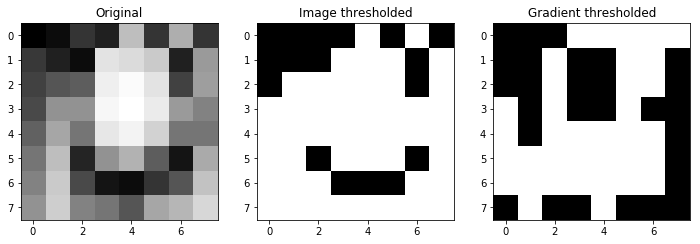

In [ ]:
threshold=70
imageB=thresholding(image,threshold)
magnitudeB=thresholding(magnitude,threshold)
print('Image thresholded\n',imageB,
      '\n\nMagnitude thresholded \n',magnitudeB)
plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
plt.title('Original')
plt.imshow(image,cmap='gray')
plt.subplot(1,3,2)
plt.title('Image thresholded')
plt.imshow(imageB,cmap='gray')
plt.subplot(1,3,3)
plt.title('Gradient thresholded')
plt.imshow(magnitudeB,cmap='gray')

Image dilated
 [[1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]] 

Dilated opencv 
 [[0 0 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 0]] Image eroded
 [[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]] 

eroded opencv 
 [[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


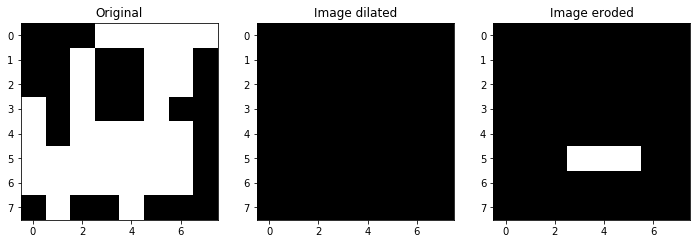

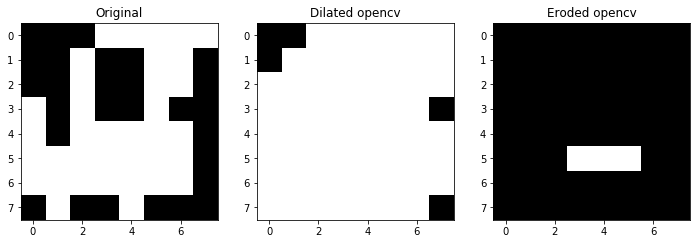

In [ ]:
structingEltD = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], np.uint8)
imageD=dilation_binary(magnitudeB,structingEltD)
structingEltE = np.ones((3,3), np.uint8)
imageE=erosion_binary(magnitudeB,structingEltE)

imageDCV = cv.dilate(magnitudeB, structingEltD, iterations=1)
imageECV = cv.erode(magnitudeB, structingEltE, iterations=1)

print('Image dilated\n',imageD,
      '\n\nDilated opencv \n',imageDCV,
      'Image eroded\n',imageE,
      '\n\neroded opencv \n',imageECV)
plt.figure(figsize=(12,8))
plt.subplot(2,3,1)
plt.title('Original')
plt.imshow(magnitudeB,cmap='gray')
plt.subplot(2,3,2)
plt.title('Image dilated')
plt.imshow(imageD,cmap='gray')
plt.subplot(2,3,3)
plt.title('Image eroded')
plt.imshow(imageE,cmap='gray')
plt.figure(figsize=(12,8))
plt.subplot(2,3,1)
plt.title('Original')
plt.imshow(magnitudeB,cmap='gray')
plt.subplot(2,3,2)
plt.title('Dilated opencv')
plt.imshow(imageDCV,cmap='gray')
plt.subplot(2,3,3)
plt.title('Eroded opencv')
plt.imshow(imageECV,cmap='gray')

In [ ]:
#Prewitt
c=1
filtreP_x = np.array([[-1,0,1],[-c,0,c],[-1,0,1]])
filtreP_y = np.array([[-1,-c,-1],[0,0,0],[1,c,1]])
#Sobel
c=2
filtreS_x = np.array([[-1,0,1],[-c,0,c],[-1,0,1]])
filtreS_y = np.array([[-1,-c,-1],[0,0,0],[1,c,1]])

Gx_Prewitt,Gy_Prewitt=prewitt_filter(image)
Gx_Prewitt_cv=cv.filter2D(image,-1,kernel=filtreP_x)
Gy_Prewitt_cv=cv.filter2D(image,-1,kernel=filtreP_y)
Gx_Sobel,Gy_Sobel=sobel_filter(image)
Gx_Sobel_cv=cv.filter2D(image,-1,kernel=filtreS_x)
Gy_Sobel_cv=cv.filter2D(image,-1,kernel=filtreS_y)

print('Prewitt_x \n',Gx_Prewitt,'\nPrewitt_x opencv \n',Gx_Prewitt_cv,
      '\nPrewitt_y \n',Gy_Prewitt,'\nPrewitt_opencv y \n',Gy_Prewitt_cv,
      '\nSobel_x \n',Gx_Sobel,'\nSobel_x opencv \n',Gx_Sobel_cv,
      '\nSobel_y \n',Gy_Sobel,'\nSobel_y opencv\n',Gy_Sobel_cv)

Prewitt_x 
 [[  42.    8.  215.  344.   -4. -203.  -48. -204.]
 [ 126.   36.  369.  502.  -16. -389. -117. -268.]
 [ 260.   56.  450.  474.  -49. -474. -222. -248.]
 [ 394.  121.  320.  393.  -45. -413. -267. -333.]
 [ 499.   12.  122.  377.  -86. -385. -121. -288.]
 [ 555. -118. -161.  207.  -41. -211.  125. -219.]
 [ 595. -154. -315.   36.   29.   12.  267. -284.]
 [ 406.  -73. -271. -106.   82.  170.  190. -265.]] 
Prewitt_x opencv 
 [[   0.  -37.  410.  551.  -29. -390.  -96.    0.]
 [   0.   36.  369.  502.  -16. -389. -117.    0.]
 [   0.   56.  450.  474.  -49. -474. -222.    0.]
 [   0.  121.  320.  393.  -45. -413. -267.    0.]
 [   0.   12.  122.  377.  -86. -385. -121.    0.]
 [   0. -118. -161.  207.  -41. -211.  125.    0.]
 [   0. -154. -315.   36.   29.   12.  267.    0.]
 [   0. -130. -453. -167.  115.  243.  331.    0.]] 
Prewitt_y 
 [[  87.   98.  268.  455.  645.  450.  385.  184.]
 [ 138.  178.  320.  308.  442.  126.  170.   -4.]
 [ 130.  264.  268.  190.   89.  19

Text(0.5, 1.0, 'Gy_Sobel opencv')

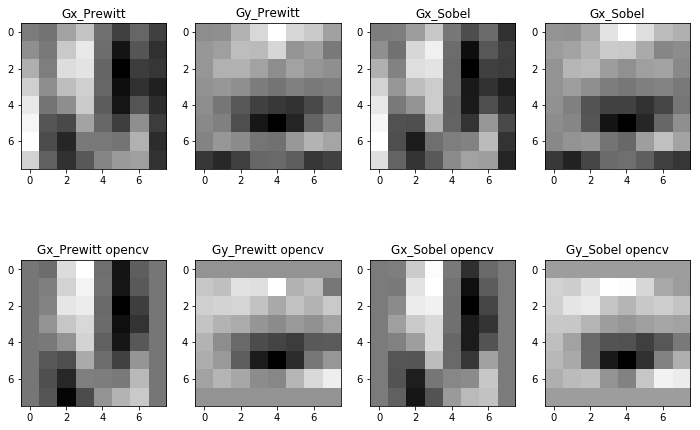

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(241)
plt.imshow(Gx_Prewitt,cmap='gray')
plt.title('Gx_Prewitt')
plt.subplot(242)
plt.imshow(Gy_Prewitt,cmap='gray')
plt.title('Gy_Prewitt')
plt.subplot(243)
plt.imshow(Gx_Sobel,cmap='gray')
plt.title('Gx_Sobel')
plt.subplot(244)
plt.imshow(Gy_Sobel,cmap='gray')
plt.title('Gx_Sobel')
plt.subplot(245)
plt.imshow(Gx_Prewitt_cv,cmap='gray')
plt.title('Gx_Prewitt opencv')
plt.subplot(246)
plt.imshow(Gy_Prewitt_cv,cmap='gray')
plt.title('Gy_Prewitt opencv')
plt.subplot(247)
plt.imshow(Gx_Sobel_cv,cmap='gray')
plt.title('Gx_Sobel opencv')
plt.subplot(248)
plt.imshow(Gy_Sobel_cv,cmap='gray')
plt.title('Gy_Sobel opencv' )

Median 
 [[  0.  12.  12.  32.  53.  53.  53.   0.]
 [ 12.  53.  53. 190. 219. 190. 154.  53.]
 [ 57.  73. 146. 227. 235. 219. 154.  65.]
 [ 73.  97. 146. 239. 239. 227. 154. 117.]
 [ 97. 117. 146. 178. 231. 178. 130. 117.]
 [117. 117. 146. 117. 146.  93. 117.  85.]
 [130. 130. 130.  85.  93.  85. 166.  85.]
 [  0. 130.  73.  20.  20.  53.  85.   0.]] 
Median opencv 
 [[ 12  12  32  53 190 174  53  53]
 [ 57  53  53 190 219 190 154 154]
 [ 65  73 146 227 235 219 154 154]
 [ 85  97 146 239 239 227 154 130]
 [117 117 146 178 231 178 130 130]
 [130 117 146 117 146  93 117 117]
 [146 130 130  85  93  85 166 182]
 [146 146 130  85  85  85 182 194]]


Text(0.5, 1.0, 'Median opencv')

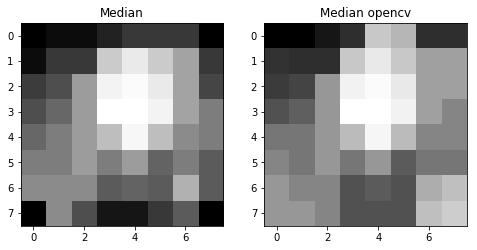

In [ ]:
sizeF=3
med=median_filter(image,sizeF)
medCV=cv.medianBlur(np.uint8(image), sizeF)
print('Median \n',med,
      '\nMedian opencv \n',medCV)
plt.figure(figsize=(8,8))
plt.subplot(121)
plt.imshow(med,cmap='gray')
plt.title('Median')
plt.subplot(122)
plt.imshow(medCV,cmap='gray')
plt.title('Median opencv')

Mean 
 [[  0.  12.  12.  32.  53.  53.  53.   0.]
 [ 12.  53.  53. 190. 219. 190. 154.  53.]
 [ 57.  73. 146. 227. 235. 219. 154.  65.]
 [ 73.  97. 146. 239. 239. 227. 154. 117.]
 [ 97. 117. 146. 178. 231. 178. 130. 117.]
 [117. 117. 146. 117. 146.  93. 117.  85.]
 [130. 130. 130.  85.  93.  85. 166.  85.]
 [  0. 130.  73.  20.  20.  53.  85.   0.]] 
Mean opencv 
 [[ 12  12  32  53 190 174  53  53]
 [ 57  53  53 190 219 190 154 154]
 [ 65  73 146 227 235 219 154 154]
 [ 85  97 146 239 239 227 154 130]
 [117 117 146 178 231 178 130 130]
 [130 117 146 117 146  93 117 117]
 [146 130 130  85  93  85 166 182]
 [146 146 130  85  85  85 182 194]]


Text(0.5, 1.0, 'Mean opencv')

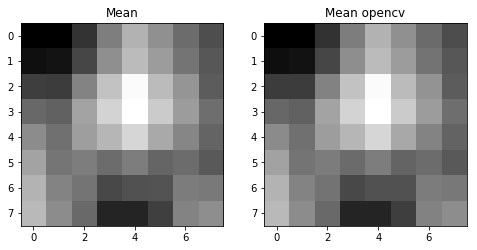

In [ ]:
sizeF=3
me=mean_filter(image,sizeF)
meCV=cv.blur(np.uint8(image), (sizeF ,sizeF))
print('Mean \n',med,
      '\nMean opencv \n',medCV)
plt.figure(figsize=(8,8))
plt.subplot(121)
plt.imshow(me,cmap='gray')
plt.title('Mean')
plt.subplot(122)
plt.imshow(meCV,cmap='gray')
plt.title('Mean opencv')

computed Gaussian filter
 [[0.059 0.097 0.059]
 [0.097 0.159 0.097]
 [0.059 0.097 0.059]]
filtered image Gaussian
 [[  8  14  29  64  84  78  62  42]
 [ 24  33  62 118 151 123  91  62]
 [ 41  62  99 154 184 147 107  69]
 [ 56  90 123 164 187 158 119  72]
 [ 69 101 117 145 165 135 103  69]
 [ 80 104  92  94 106  86  81  71]
 [ 88 115  87  61  64  70  94  88]
 [ 67  91  72  46  46  63  88  75]]
filtered image Gaussian opencv
 [[ 29.  30.  70. 132. 174. 147. 117.  94.]
 [ 42.  45.  87. 147. 183. 157. 124. 101.]
 [ 80.  79. 136. 188. 234. 183. 150. 105.]
 [114. 110. 163. 203. 238. 196. 157. 120.]
 [143. 121. 158. 178. 205. 168. 138. 111.]
 [162. 126. 131. 118. 132. 112. 117. 103.]
 [176. 137. 124.  88.  96.  97. 130. 129.]
 [180. 144. 116.  61.  60.  82. 137. 146.]]


Text(0.5, 1.0, 'Gaussian opencv')

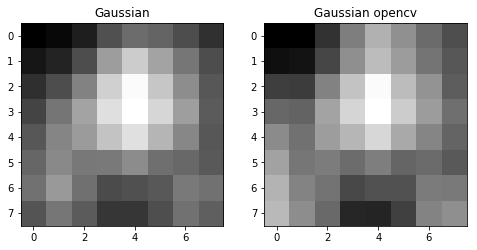

In [ ]:
Fsize=3
sigma=1
filtre=make_gaussian(Fsize, sigma)
imG=gaussian_filter(image,Fsize, sigma)
imGCV= cv.GaussianBlur(image, (Fsize,Fsize),cv.BORDER_DEFAULT)

print('computed Gaussian filter\n',np.round(filtre,3))
print('filtered image Gaussian\n',imG)
print('filtered image Gaussian opencv\n',np.round(imGCV))
plt.figure(figsize=(8,8))
plt.subplot(121)
plt.imshow(imG,cmap='gray')
plt.title('Gaussian')
plt.subplot(122)
plt.imshow(imGCV,cmap='gray')
plt.title('Gaussian opencv')

filtered image Laplacian
 [[  71.   38. -155.  343. -455.  355. -557.  118.]
 [-130.   38.  357. -406.   -6. -277.  467. -372.]
 [ -44.   -4.  110. -138.  -64. -155.  311. -282.]
 [  17. -114.   19. -117.  -44.  -94.  -69.  -90.]
 [ -31. -114.  111. -171.  -98. -152.   33.  -50.]
 [ -50. -239.  382. -119. -218.   89.  385. -348.]
 [ -54. -209.   96.  268.  288.  144.  109. -305.]
 [-246. -345. -123. -232.  -44. -343. -261. -482.]]
filtered image Laplacian opencv
 [[ 138.   69. -144.  569. -237.  556. -526.  444.]
 [ -99.   38.  357. -406.   -6. -277.  467. -341.]
 [  40.   -4.  110. -138.  -64. -155.  311. -218.]
 [ 162. -114.   19. -117.  -44.  -94.  -69.   63.]
 [ 134. -114.  111. -171.  -98. -152.   33.   66.]
 [ 139. -239.  382. -119. -218.   89.  385. -329.]
 [ 147. -209.   96.  268.  288.  144.  109. -221.]
 [  88. -144.  -51. -213.  -33. -291. -177. -108.]]


Text(0.5, 1.0, 'Laplacian opencv')

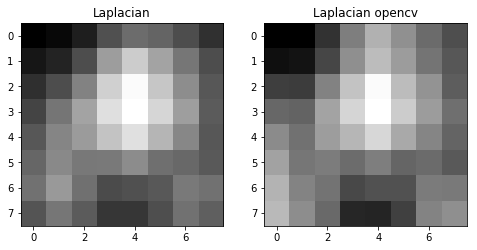

In [ ]:
imageL=laplacian_filter(image)
imageLCV = cv.Laplacian(image, cv.CV_64F)

print('filtered image Laplacian\n',imageL)
print('filtered image Laplacian opencv\n',np.round(imageLCV))
plt.figure(figsize=(8,8))
plt.subplot(121)
plt.imshow(imG,cmap='gray')
plt.title('Laplacian')
plt.subplot(122)
plt.imshow(imGCV,cmap='gray')
plt.title('Laplacian opencv')

# Extra 1
Ajouter bruit puis filtrer

In [ ]:
Fsize=3
sigma=1
import random
def sp_noise(image,prob):
    '''
    Add salt pepper noise
         PROB: Noise ratio 
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output


def gasuss_noise(image, mean=0, var=0.001):
    ''' 
                 Add Gaussian noise
                 Mean: mean 
                 Var: Variance
    '''
    image = np.array(image/255, dtype=float)
    noise = np.random.normal(mean, var ** 0.5, image.shape)
    out = image + noise
    out = np.uint8(out*255)
    #cv.imshow("gasuss", out)
    return out

In [ ]:
image =cv.imread('image.tif',0)


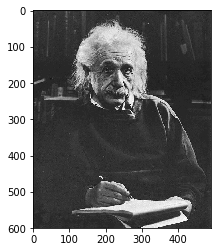

In [ ]:
plt.imshow(image,cmap='gray')

Text(0.5, 1.0, 'Gaussian noise')

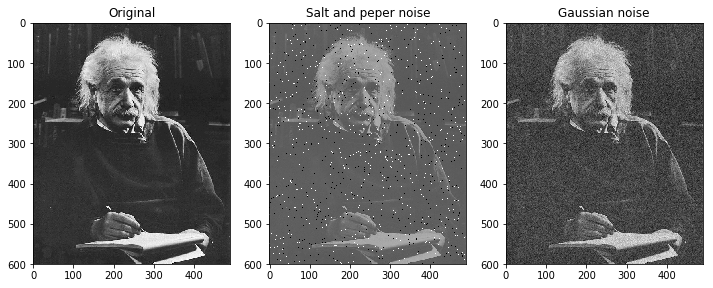

In [ ]:
image2=sp_noise(image,0.01)
image3=gasuss_noise(image)
plt.figure(figsize=(12,8))
plt.subplot(131)
plt.imshow(image,cmap='gray')
plt.title('Original')
plt.subplot(132)
plt.imshow(image2,cmap='gray')
plt.title('Salt and peper noise')
plt.subplot(133)
plt.imshow(image3,cmap='gray')
plt.title('Gaussian noise')


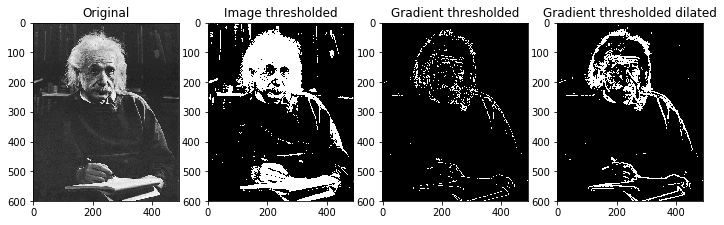

In [ ]:
magnitude=g_magnitude(image)
orientation=g_orientation(image)
threshold=100
imageB=thresholding(image,threshold)
threshold=20
magnitudeB=thresholding(magnitude,threshold)
structingElt = np.ones((3,3), np.uint8)
imageD=dilation_binary(magnitudeB,structingElt)
plt.figure(figsize=(12,8))
plt.subplot(1,4,1)
plt.title('Original')
plt.imshow(image,cmap='gray')
plt.subplot(1,4,2)
plt.title('Image thresholded')
plt.imshow(imageB,cmap='gray')
plt.subplot(1,4,3)
plt.title('Gradient thresholded')
plt.imshow(magnitudeB,cmap='gray')
plt.subplot(1,4,4)
plt.title('Gradient thresholded dilated')
plt.imshow(imageD,cmap='gray')

In [ ]:
Fsize=5
imG=gaussian_filter(image2,Fsize, sigma)
me=mean_filter(image2,sizeF)
med=median_filter(image2,sizeF)

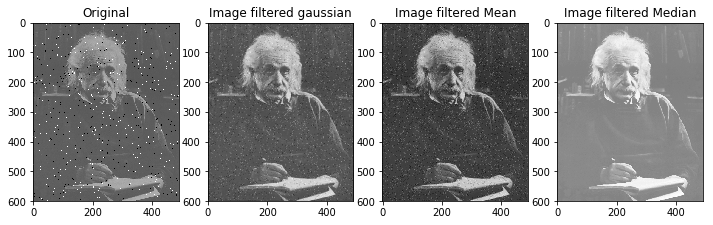

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(1,4,1)
plt.title('Original')
plt.imshow(image2,cmap='gray')
plt.subplot(1,4,2)
plt.title('Image filtered gaussian')
plt.imshow(imG,cmap='gray')
plt.subplot(1,4,3)
plt.title('Image filtered Mean')
plt.imshow(me,cmap='gray')
plt.subplot(1,4,4)
plt.title('Image filtered Median')
plt.imshow(med,cmap='gray')

# Extra 2
Morphologie

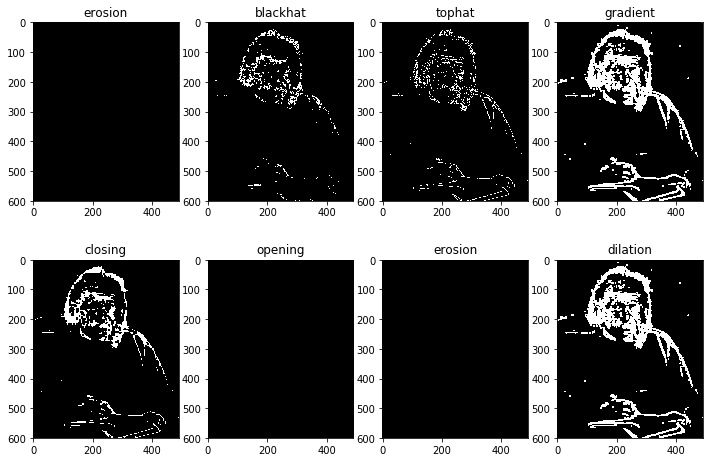

In [ ]:
imgINV=magnitudeB.copy()
kernel = np.ones((5,5),np.uint8)
erosion = cv.erode(imgINV,kernel,iterations = 1)
dilation = cv.dilate(imgINV,kernel,iterations = 1)
opening = cv.morphologyEx(imgINV, cv.MORPH_OPEN, kernel)
closing = cv.morphologyEx(imgINV, cv.MORPH_CLOSE, kernel)
#difference entre dilation et erosin
gradient = cv.morphologyEx(imgINV, cv.MORPH_GRADIENT, kernel)
#difference entre opening et original
tophat = cv.morphologyEx(imgINV, cv.MORPH_TOPHAT, kernel)
#difference entre closing et original
blackhat = cv.morphologyEx(imgINV, cv.MORPH_BLACKHAT, kernel)
# Rectangular Kernel
cv.getStructuringElement(cv.MORPH_RECT,(5,5))
# Elliptical Kernel
cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
# Cross-shaped Kernel
cv.getStructuringElement(cv.MORPH_CROSS,(5,5))
erosion = cv.erode(imgINV,cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5)),iterations = 1)

plt.figure(figsize=(12,8))
plt.subplot(2,4,1)
plt.title('erosion')
plt.imshow(erosion, cmap='gray')
plt.subplot(2,4,2)
plt.title('blackhat')
plt.imshow(blackhat, cmap='gray')
plt.subplot(2,4,3)
plt.title('tophat')
plt.imshow(tophat, cmap='gray')
plt.subplot(2,4,4)
plt.title('gradient')
plt.imshow(gradient, cmap='gray')
plt.subplot(2,4,5)
plt.title('closing')
plt.imshow(closing, cmap='gray')
plt.subplot(2,4,6)
plt.title('opening')
plt.imshow(opening, cmap='gray')
plt.subplot(2,4,7)
plt.title('erosion')
plt.imshow(erosion, cmap='gray')
plt.subplot(2,4,8)
plt.title('dilation')
plt.imshow(dilation, cmap='gray')